In [1]:
import sys
sys.path.append('../src')

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from utils import *

import seaborn as sns
sns.set()

# This training

We will be working with data generated by Python functions and using random number generators. I will refer to these data by what they _could be_. For example, we'll start with daily counts of tweets for a prolific user.

We take this approach because it allows us to set the "ground truth" behind the data. We can also see how the amount, quality, and character of the data affects its usability and our inferences.

## Exploratory Data Analysis

When you would like to use data, particularly data you haven't worked with before, there are a few things you should do first. 

+ what are the values of various summary statistics (mean, variance, etc…)?
+ how is the data distributed?
+ are there outliers?
+ do some data points have null/NaN values? how might we deal with those?

In this lesson we will talk about a few different approaches to exploratory data analysis (EDA). EDA is essential for you to discover the character of your data, the relationships between variables, and the potential problems inherent in the dataset.

The data we will be working with are either generated using functions or are contained within CSV files in this repo.

In [3]:
tweet_counts = tweets_data(mean=50, seed=484)

### What is in `tweet_counts` now?

In [4]:
# how much data are in there?
display(tweet_counts.shape)

(1000,)

one column of data with 1000 rows

In [5]:
display(tweet_counts.mean())

51.736

the mean is around 50

what about some other descriptive statistics?

In [6]:
print("Variance:")
display(tweet_counts.var())
print("Standard deviation:")
display(tweet_counts.std())
print("Square root of the variance:")
display(np.sqrt(tweet_counts.var()))

Variance:


56.076380380380385

Standard deviation:


7.488416413393447

Square root of the variance:


7.488416413393447

[Moments of a Distribution](https://en.wikipedia.org/wiki/Moment_(mathematics))

There are higher-order moments for the data distribution. These describe asymmetries in the shape of the data.

In [7]:
display(tweet_counts.describe())

count    1000.000000
mean       51.736000
std         7.488416
min        26.000000
25%        47.000000
50%        52.000000
75%        57.000000
max        75.000000
dtype: float64

In [8]:
display(stats.skew(tweet_counts))
display(stats.kurtosis(tweet_counts))

-0.013340342004117798

0.046537885814408764

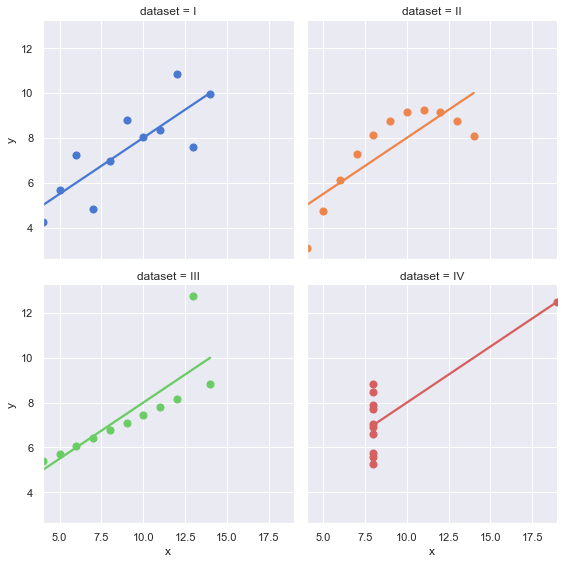

In [9]:
plot_anscombe()

## Percentiles and the Cumulative Distribution

Notice in the call to `describe` above that beyond the count of value, their minimum, mean, standard deviation, and maximum we also obtain some percentile values. These values correspond to the points at which a certain percentage of the data falls below that value. The 50th percentile has a special name, the median. The gap between the 25th and the 75th is called the inter-quartile range (IQR).

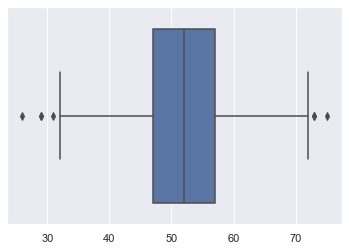

In [10]:
sns.boxplot(tweet_counts)

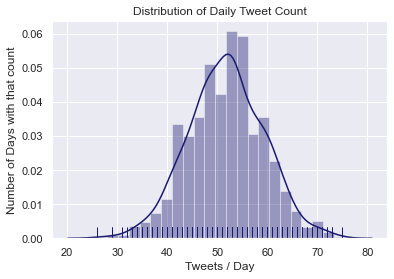

In [11]:
sample_mean = tweet_counts.mean()
bins = np.linspace(0.5*sample_mean, 1.5*sample_mean, 25)
ax = sns.distplot(
    tweet_counts, 
    bins=bins, 
    rug=True,
    color='midnightblue',
)
_ = ax.set_xlabel('Tweets / Day')
_ = ax.set_ylabel('Number of Days with that count')
_ = ax.set_title('Distribution of Daily Tweet Count')

## Cumulative distributions

The above histogram is a _differential_ distribution, showing the number of values falling in a bin. A _cumulative_ shows the fraction of values falling to the left/lower of the value you are looking at on the x-axis. Here's the cumulative distribution for our tweet counts data:

In [22]:
import inspect
import IPython.display as disp
disp.Code(inspect.getsource(cumulative_d))

def cumulative_d(data):
    sorted_data = data.sort_values()
    n = data.size
    y = np.arange(1, n+1) / n
    
    return (sorted_data, y)

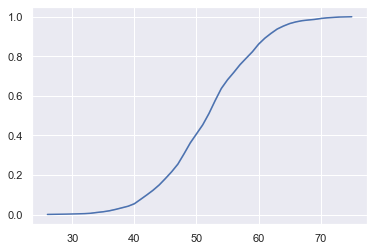

In [21]:
x_c, y_c = cumulative_d(tweet_counts)
ax = sns.lineplot(x_c, y_c)

In [13]:
import inspect
import IPython.display as disp
disp.Code(inspect.getsource(tweets_data))

def tweets_data(mean=50, size=1000, seed=None):
    """Generate simple column of counts data as a Pandas Series."""
    if seed is not None:
        np.random.seed(seed)

    # generate counts data
    samples = np.random.poisson(mean, size=size)
    dates = pd.date_range('2016-01-01', periods=size)

    # more on the weekend
    wknd_samples = np.random.poisson(mean * 0.1, size=size) * dates.map(
        wknd_add
    )

    return pd.Series(data=samples + wknd_samples, index=dates)